<a href="https://www.kaggle.com/code/antonymgitau/linear-regression-example?scriptVersionId=197079511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd # will use it to open and manipulate the dataset
import matplotlib.pyplot as plt #for visualizing the dataset*

In [2]:
#Loading and looking at the first rows of the data
data = pd.read_csv("/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


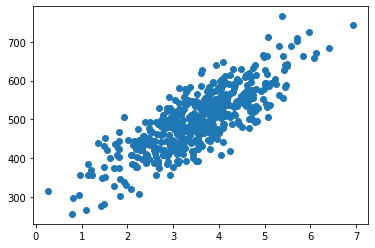

In [4]:
#Suppose we want to predict how much a customer is likely to spend in a year based on their engagement metrics
plt.scatter(data["Length of Membership"],data["Yearly Amount Spent"])
plt.savefig('scatter_plot.png', format='png') # tobe able to download the plot
plt.show()

In [5]:
# X - feature (input to the model), 
# y -target (output from the model)

X = data["Length of Membership"]
y = data["Yearly Amount Spent"]

In [6]:
#initialize the parameters
m = 0  #slope of line or weights
c = 0  #y-intercept of line or bias
L = 0.001  #Learning rate
epochs = 10000  #Number of iterations
n = len(X)

In [7]:
#store the gradients and the updated values of 𝑚 across all iterations.
diff_m = []
param_m = []

#iterate over the total number of examples
for i in range(epochs):
    # equation of a line
    y_pred = m*X + c 
    
    # partial derivative of the loss function with respect to 𝑚
    dm = (-2/n) * np.sum(X * (y-y_pred)) 
    diff_m.append(dm)
    
    # partial derivative of the loss function with respect to c
    dc = (-2/n) * np.sum(y-y_pred)
    
    #updates the slope 𝑚 and c by moving it in the direction of decreasing error
    m = m - L*dm
    c = c - L*dc
    param_m.append(m)
    
print(m,c)

80.00503981322889 212.47592090162595


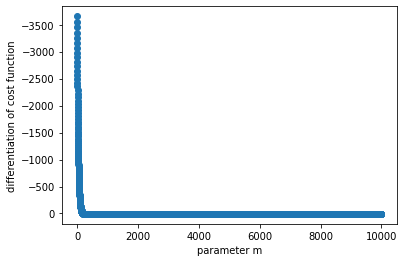

In [8]:
plt.scatter(range(epochs),diff_m)
plt.ylabel('differentiation of cost function')
plt.xlabel('parameter m')
ax = plt.gca()
ax.invert_yaxis()
plt.show()


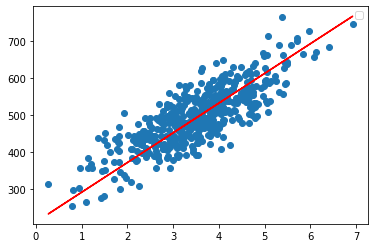

In [9]:
# showing predictions
plt.scatter(X,y)
plt.plot(X,y_pred,color ='r')
plt.legend()
plt.show()

In [10]:
# Evaluate the model:  using mse = mean_squared_error(y, y_pred)
mse = np.sum((y_pred - y)**2)*(1/len(X))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2433.9991529681793


## **Contrast the "from scratch" implementation with one using "Scikit-learn library" **

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
# X = data[['Length of Membership']]
Xs = data[['Length of Membership']]
ys = data['Yearly Amount Spent']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1984.2786913971588


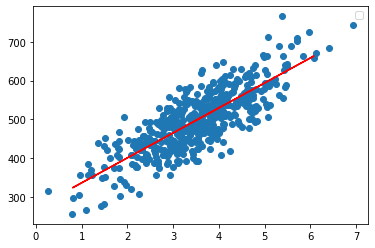

In [12]:
# showing predictions
plt.scatter(X,y)
plt.plot(X_test,predictions,color ='r')
plt.legend()
plt.show()

Some useful resource which i built upon
#I reproduce the work of - https://www.kaggle.com/code/suhailahmed/building-simple-linear-regressor-from-scratch with some modification

